In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist, imdb, cifar10, fashion_mnist
from keras.models import Sequential

from keras import backend as K
import cv2
import glob
import os 
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

from tensorflow.keras.losses import categorical_crossentropy







In [2]:
batch_size =32
num_classes = 5
epochs = 300
img_rows, img_cols = 28, 28

In [ ]:


# Load both datasets
df1 = pd.read_csv('hand_gesture_data.csv')
df2= pd.read_csv('hand_gesture_data2.csv')

# Drop I and J from dataset1
df1_cleaned = df1[~df1['label'].isin(['I', 'J'])]

# Select only I and J from dataset2
df2_IJ = df2[df2['label'].isin(['I', 'J'])]

# Combine them
final_df = pd.concat([df1_cleaned, df2_IJ], ignore_index=True)

# Optional: Shuffle the combined dataset
final_df = final_df.sample(frac=1).reset_index(drop=True)

# Save the new dataset
final_df.to_csv('merged_hand_gesture_dataset.csv', index=False)


In [11]:
import pandas as pd

# Load both datasets
df1 = pd.read_csv('Dataset2.csv')
df2= pd.read_csv('Dataset1.csv')


# Select only I and J from dataset2
df2_J = df2[df2['label'].isin(['J'])]

# Combine them
final_df = pd.concat([df1, df2_J], ignore_index=True)

# Optional: Shuffle the combined dataset
final_df = final_df.sample(frac=1).reset_index(drop=True)
# Save the new dataset
final_df.to_csv('new_dataset.csv', index=False)


In [ ]:

# Load the data
df = pd.read_csv('new_dataset.csv')

# Split features and labels
X = df.drop('label', axis=1).values
y = df['label'].values

# Encode labels (e.g., A, B → 0, 1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)


In [ ]:


model = Sequential([
    Dense(64, activation='relu', input_shape=(42,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')  # Output = number of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)




In [26]:
history=model.fit(X_train, y_train, epochs=98, validation_data=(X_test, y_test))


Epoch 1/98
341/341 [==============================] - 1s 2ms/step - loss: 2.1871 - accuracy: 0.2203 - val_loss: 1.8370 - val_accuracy: 0.4894
Epoch 2/98
341/341 [==============================] - 0s 1ms/step - loss: 1.5302 - accuracy: 0.5133 - val_loss: 0.9898 - val_accuracy: 0.7973
Epoch 3/98
341/341 [==============================] - 1s 2ms/step - loss: 0.9825 - accuracy: 0.7162 - val_loss: 0.6224 - val_accuracy: 0.8757
Epoch 4/98
341/341 [==============================] - 0s 1ms/step - loss: 0.7401 - accuracy: 0.7951 - val_loss: 0.4384 - val_accuracy: 0.9348
Epoch 5/98
341/341 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.8403 - val_loss: 0.3561 - val_accuracy: 0.9446
Epoch 6/98
341/341 [==============================] - 0s 1ms/step - loss: 0.5034 - accuracy: 0.8758 - val_loss: 0.3228 - val_accuracy: 0.9402
Epoch 7/98
341/341 [==============================] - 1s 2ms/step - loss: 0.4439 - accuracy: 0.8893 - val_loss: 0.2612 - val_accuracy: 0.9549
Epoch 

In [59]:
model.save("hand_gesture_model_improve.h5")

import pickle
with open("label_encoder_improve.pkl", "wb") as f:
    pickle.dump(le, f)


86/86 [==============================] - 0s 887us/step
Classification Report (Gesture Labels):
               precision    recall  f1-score   support

         Stop       0.98      0.96      0.97       205
           Up       0.95      0.98      0.96       286
         Down       0.95      0.95      0.95       240
         left       0.95      0.98      0.97       241
        right       0.99      0.96      0.98       254
       follow       1.00      0.98      0.99       219
    turn left       0.99      1.00      0.99       279
   turn right       1.00      0.98      0.99       206
move backward       0.99      1.00      1.00       314
 move farward       1.00      0.98      0.99       466
         Flip       1.00      0.94      0.97        18

     accuracy                           0.98      2728
    macro avg       0.98      0.98      0.98      2728
 weighted avg       0.98      0.98      0.98      2728

Accuracy: 0.9802052785923754


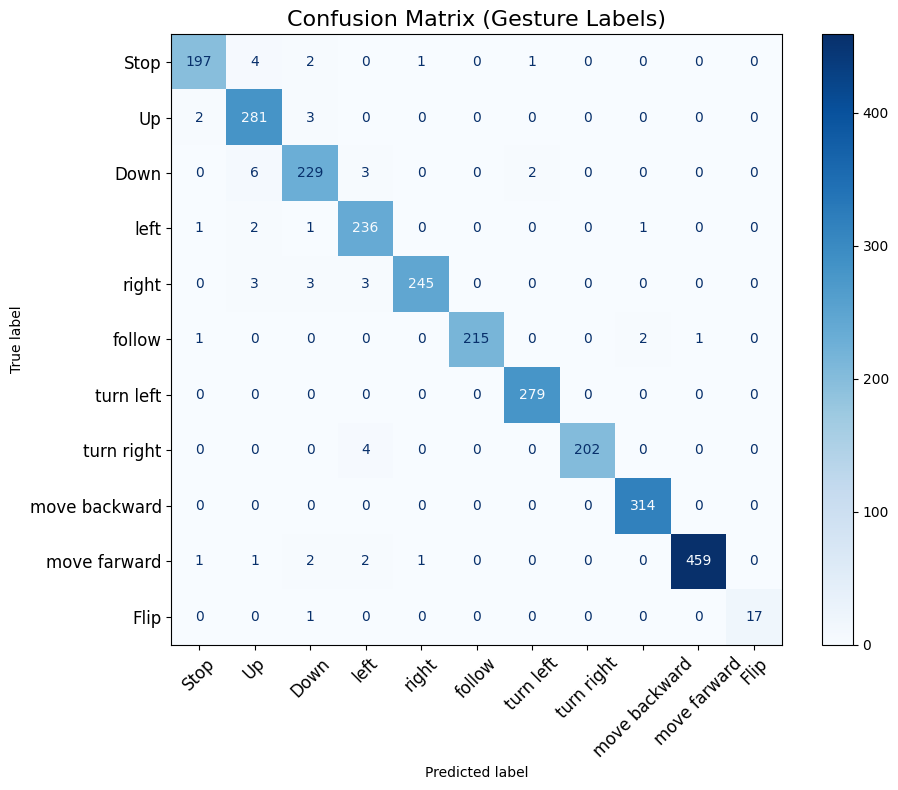

In [48]:


# Predict
y_pred_probs = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)




# Decode predicted and true labels (from integers to 'A'...'J')
y_pred_labels = le.inverse_transform(y_pred_encoded)
label_map = {
    'A': 'Stop',
    'B': 'Up',
    'C': 'Down',
    'D': 'left',
    'E': 'right',
    'F': 'follow',
    'G': 'turn left',
    'H': 'turn right',
    'I': 'move backward',
    'J': 'move farward',
    'Q':'Flip'
}
class_names = [label_map[label] for label in le.classes_]
if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_encoded = np.argmax(y_test, axis=1)
    y_test_labels = le.inverse_transform(y_test_encoded)
else:
    y_test_labels = le.inverse_transform(y_test)

# Optional: Convert to full gesture names using your label_map

#class_names = [label_map[label] for label in le.classes_]  # Ordered by how LabelEncoder encoded them

# Classification Report
print("Classification Report (Gesture Labels):")
print(classification_report(y_test_labels, y_pred_labels, target_names=class_names))

# Accuracy
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
gesture_labels = [label_map[label] for label in le.classes_]

# Plot confusion matrix with gesture labels
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test_labels,
    y_pred_labels,
    display_labels=gesture_labels,
    ax=ax,
    cmap="Blues"
)
disp.ax_.set_title("Confusion Matrix (Gesture Labels)", fontsize=16)
disp.ax_.tick_params(axis='x', labelsize=12)
disp.ax_.tick_params(axis='y', labelsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




86/86 [==============================] - 0s 880us/step
Classification Report (Original Labels):
              precision    recall  f1-score   support

           A       0.98      0.96      0.97       205
           B       0.95      0.98      0.96       286
           C       0.95      0.95      0.95       240
           D       0.95      0.98      0.97       241
           E       0.99      0.96      0.98       254
           F       1.00      0.98      0.99       219
           G       0.99      1.00      0.99       279
           H       1.00      0.98      0.99       206
           I       0.99      1.00      1.00       314
           J       1.00      0.98      0.99       466
           Q       1.00      0.94      0.97        18

    accuracy                           0.98      2728
   macro avg       0.98      0.98      0.98      2728
weighted avg       0.98      0.98      0.98      2728

Accuracy: 0.9802052785923754


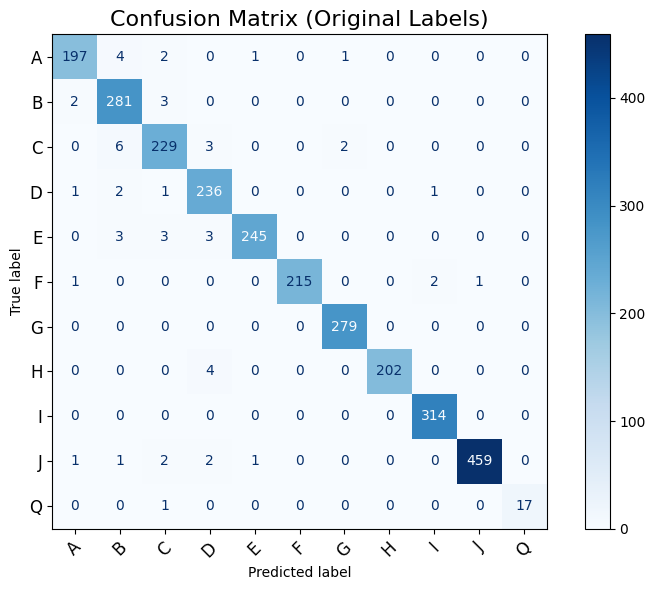

In [51]:
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict
y_pred_probs = model.predict(X_test)
y_pred_encoded = np.argmax(y_pred_probs, axis=1)

# Decode predicted and true labels (back to 'A'...'J')
y_pred_labels = le.inverse_transform(y_pred_encoded)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_test_encoded = np.argmax(y_test, axis=1)
    y_test_labels = le.inverse_transform(y_test_encoded)
else:
    y_test_labels = le.inverse_transform(y_test)

# === Use original labels ===
original_labels = le.classes_  # e.g., ['A', 'B', ..., 'J', 'Q']

# Classification Report with original labels
print("Classification Report (Original Labels):")
print(classification_report(y_test_labels, y_pred_labels, target_names=original_labels))

# Accuracy
print("Accuracy:", accuracy_score(y_test_labels, y_pred_labels))
# Plot confusion matrix with original labels
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust figure size
disp = ConfusionMatrixDisplay.from_predictions(
    y_test_labels,
    y_pred_labels,
    display_labels=original_labels,
    ax=ax,
    cmap="Blues"
)
disp.ax_.set_title("Confusion Matrix (Original Labels)", fontsize=16)
disp.ax_.tick_params(axis='x', labelsize=12)
disp.ax_.tick_params(axis='y', labelsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


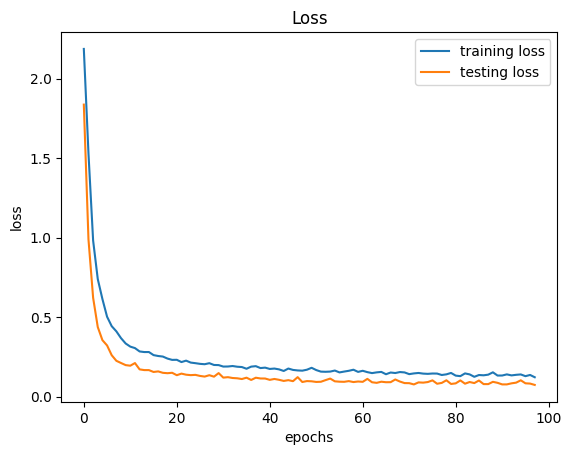

In [52]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

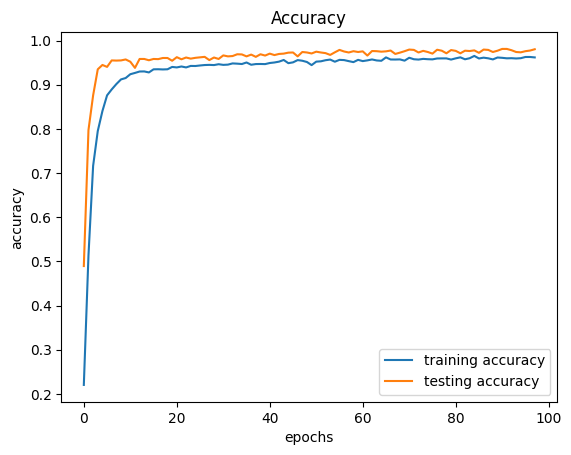

In [53]:
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

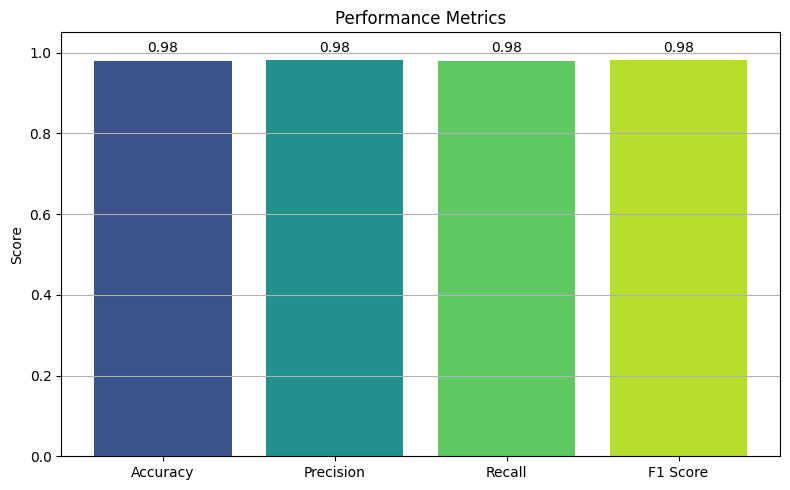

In [58]:

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Assume y_test_labels and y_pred_labels are already decoded
# If not, decode from encoded labels using LabelEncoder.inverse_transform()

# Compute metrics
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1 = report['weighted avg']['f1-score']

# Bar chart values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=['#3b528b', '#21918c', '#5ec962', '#b5de2b'])

# Add text labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=10)

plt.ylim(0, 1.05)
plt.title("Performance Metrics")
plt.ylabel("Score")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


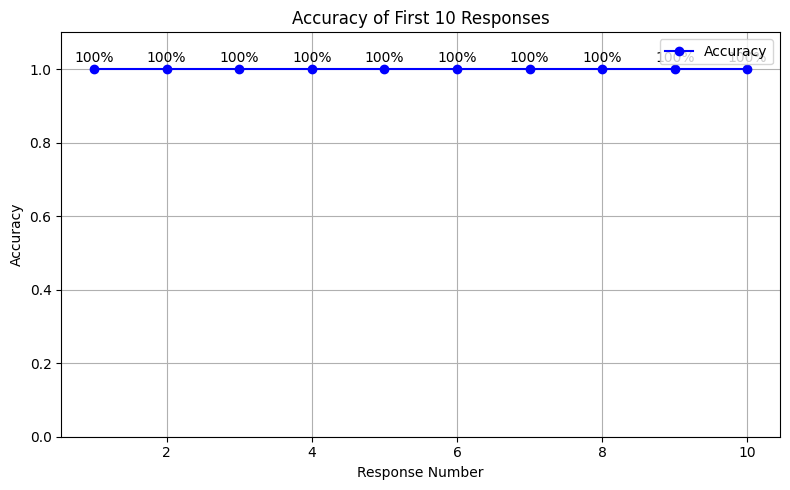

In [39]:


# Create accuracy list per test sample (1.0 = correct, 0.0 = incorrect)
accuracies = [1.0 if pred == true else 0.0 for pred, true in zip(y_pred_labels, y_test_labels)]

# Use only first 10 responses for the plot
x = list(range(1, 11))  # [1, 2, ..., 10]

plt.figure(figsize=(8, 5))
plt.plot(x, accuracies[:10], 'bo-', label='Accuracy')  # Plot first 10 points

# Add percentage labels above each point
for i in range(10):
    plt.text(x[i], accuracies[i] + 0.02, f"{accuracies[i]*100:.0f}%", ha='center')

plt.title("Accuracy of First 10 Responses")
plt.xlabel("Response Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1.1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


86/86 [==============================] - 0s 859us/step


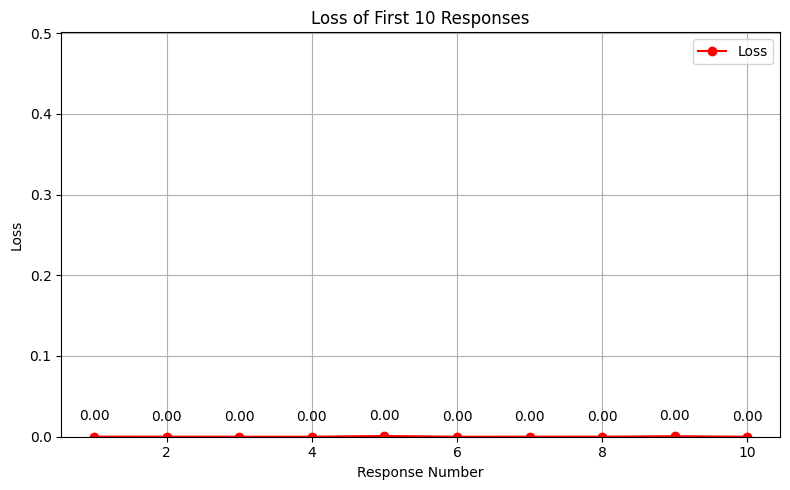

In [42]:
# Select first 10 responses


# Get model predictions
y_pred_probs = model.predict(X_test)

# Compute per-sample loss
losses = categorical_crossentropy(y_test, y_pred_probs).numpy()

x = list(range(1, 11))
loss_values = losses[:10]

plt.figure(figsize=(8, 5))
plt.plot(x, loss_values, 'ro-', label='Loss')  # Red circles for loss

# Add labels above points
for i in range(10):
    plt.text(x[i], loss_values[i] + 0.02, f"{loss_values[i]:.2f}", ha='center')

plt.title("Loss of First 10 Responses")
plt.xlabel("Response Number")
plt.ylabel("Loss")
plt.ylim(0, max(loss_values) + 0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

